In [33]:
import pandas as pd
old_filename=
new_filename=
#Split the longitude , latitude and the value in different columns:
with open(old_filename, 'r') as f_in, open(new_filename, 'w') as f_out:
    head=next(f_in).replace(" ","")
    f_out.write(head)
    [f_out.write(','.join(line.split()) + '\n') for line in f_in if line[:8]!="Latitude"]

In [34]:
data=pd.read_csv("Data/test_low_res.csv",delimiter=",")

In [37]:
red_grid=(data.Longitude%1==0)&(data.Latitude%1==0)

In [59]:
red_grid_data=data[red_grid]

In [184]:
date=red_grid_data.validityDate[0]
time=red_grid_data.validityTime[0]
data_single_time=red_grid_data[(red_grid_data.validityTime==time)&(red_grid_data.validityDate==date)].reset_index()

In [185]:
#Measure the size of one single observation:
print("Size of one data reduced data point")
data_single_time.count

Size of one data reduced data point


<bound method DataFrame.count of      index  Latitude  Longitude         Value  dataDate  dataTime  \
0        0      45.0     -111.0      0.226929  19891231         0   
1       10      45.0     -110.0      0.893921  19891231         0   
2       20      45.0     -109.0      0.139038  19891231         0   
3       30      45.0     -108.0      0.263062  19891231         0   
4       40      45.0     -107.0     -1.216431  19891231         0   
..     ...       ...        ...           ...       ...       ...   
643  55363      37.0      -98.0  97238.789062  19891231         0   
644  55373      37.0      -97.0  97651.789062  19891231         0   
645  55383      37.0      -96.0  98721.789062  19891231         0   
646  55393      37.0      -95.0  98732.789062  19891231         0   
647  55403      37.0      -94.0  97131.789062  19891231         0   

     validityDate  validityTime shortName  
0        19900101             0       10u  
1        19900101             0       10u  
2     

In [186]:
#Reshape the data such that the column Value is at the end:
cols=data_single_time.columns.to_list()
cols_perm=cols[:3]+cols[4:]+[cols[3]]
perm_data_single_time=data_single_time[cols_perm]

In [187]:
df_wind_u=perm_data_single_time[perm_data_single_time.shortName=="10u"].reset_index(drop=True)
df_wind_v=perm_data_single_time[perm_data_single_time.shortName=="10v"].reset_index(drop=True)
df_temp=perm_data_single_time[perm_data_single_time.shortName=="2t"].reset_index(drop=True)
df_sp=perm_data_single_time[perm_data_single_time.shortName=="sp"].reset_index(drop=True)

In [188]:

#Rename the value column:
df_wind_u.rename(columns={'Value':'Wind_u'}, inplace=True)
df_wind_v.rename(columns={'Value':'Wind_v'}, inplace=True)
df_temp.rename(columns={'Value':'temp'}, inplace=True)
df_sp.rename(columns={'Value':'sp'}, inplace=True)
#Remove the short name:
df_wind_u.drop(columns=["shortName","index"],inplace=True)
df_wind_v.drop(columns=["shortName","index"],inplace=True)
df_temp.drop(columns=["shortName","index"],inplace=True)
df_sp.drop(columns=["shortName","index"],inplace=True)


In [189]:
#Control whether they have the same entries???

#??????

In [190]:
merged_data=pd.merge(pd.merge(pd.merge(df_wind_u,df_wind_v),df_temp),df_sp)

In [191]:
X=merged_data[['Latitude','Longitude']].to_numpy()
Y_full=merged_data[['Wind_u','Wind_v','temp','sp']].to_numpy()
Y_wind=merged_data[['Wind_u','Wind_v']].to_numpy()

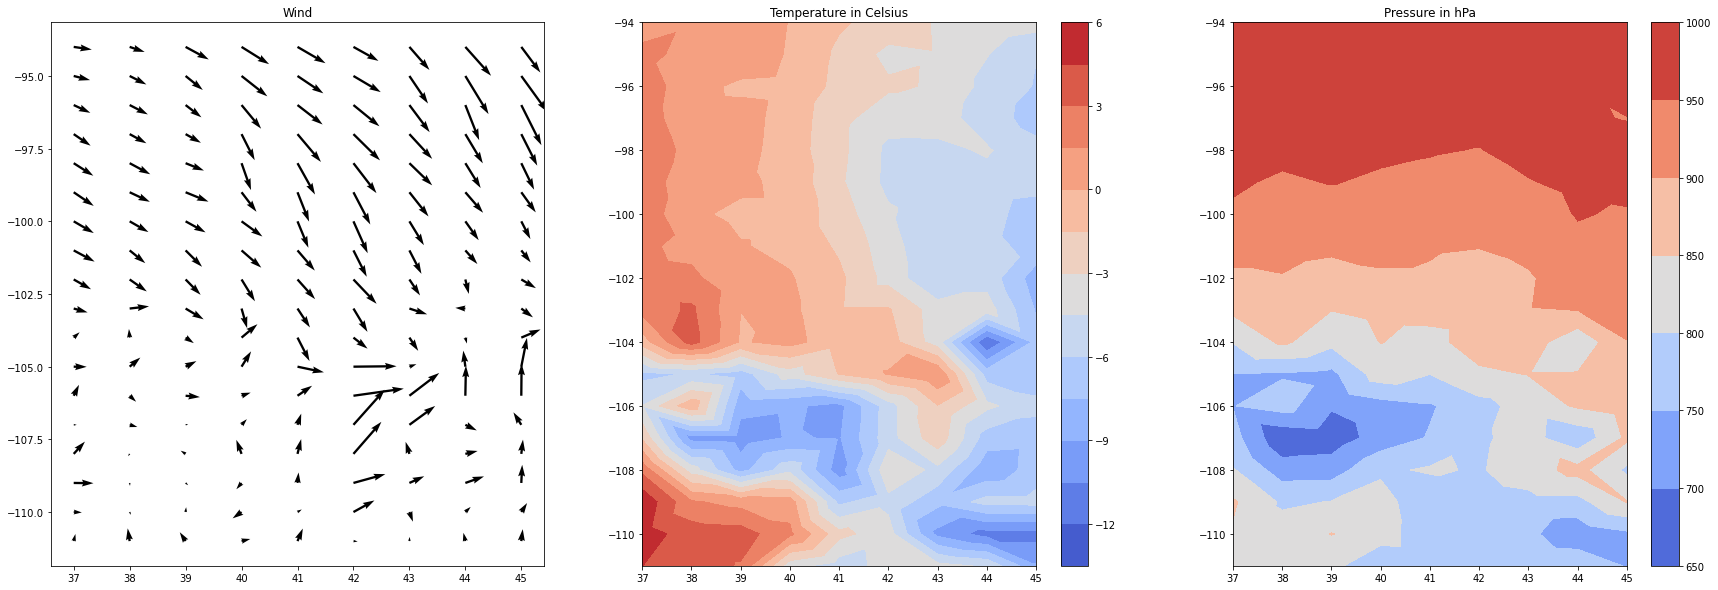

In [221]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(30,10))
ax[0].quiver(X[:,0],X[:,1],Y_wind[:,0],Y_wind[:,1])
ax[0].set_title("Wind")
temp_plot=ax[1].tricontourf(X[:,0],X[:,1],Y_full[:,2]-273,15,cmap='coolwarm')
ax[1].set_title("Temperature in Celsius")
sp_plot=ax[2].tricontourf(X[:,0],X[:,1],Y_full[:,3]/100,cmap='coolwarm')
#fig.clabel(ax[2], inline=1, fontsize=10)
ax[2].set_title("Pressure in hPa")

fig.colorbar(temp_plot, ax=ax[1])
fig.colorbar(sp_plot, ax=ax[2])

